<font size="6">ML to NLP Workshop for School Pupils</font>

Author: Lokesh Mishra

There are three tasks in this sheet. In all tasks, we will be using pre-trained model and simply play and explore with their capabilities. These tasks are:
    
    - Object detection from images
    
    - Word embeddings
    
    - Image captions

# Working with Jupyter Notebooks

# Imports

In this section, we will import all the necessary libraries that we will use.

In [55]:
# For running inference on the TF-Hub module.
import tensorflow as tf
import tensorflow_hub as hub

# For downloading the image.
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# For drawing onto the image.
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# For measuring the inference time.
import time

# For utility functions
from utils import *
import pandas as pd

In [56]:
print(tf.version)

<module 'tensorflow._api.v2.version' from '/Users/mis/opt/anaconda3/envs/env_ml/lib/python3.10/site-packages/tensorflow/_api/v2/version/__init__.py'>


# Task 1: Object Recognition

The contents of this task are based on this [page](https://www.tensorflow.org/hub/tutorials/object_detection).

Image downloaded to /var/folders/h0/1127ghhj661_7k95prlcdh040000gn/T/tmplhsln5m4.jpg.


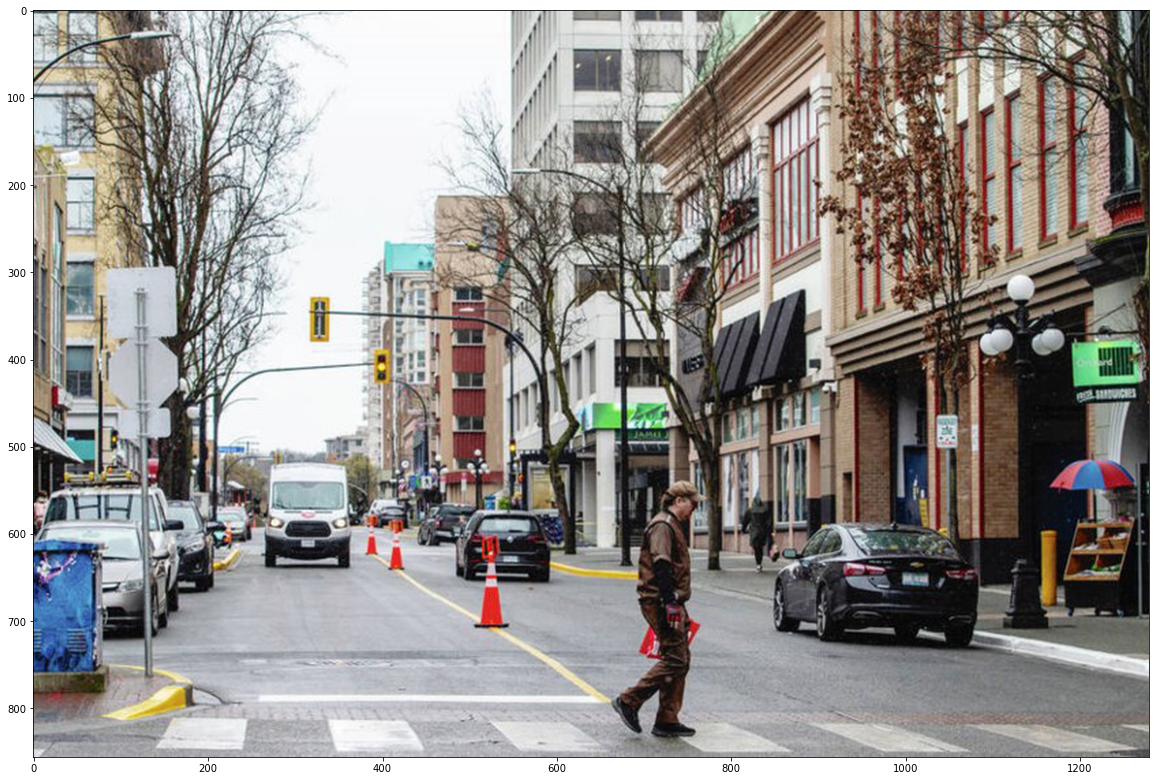

In [57]:
image_url = 'https://www.vmcdn.ca/f/files/victoriatimescolonist/json/2022/03/web1_vka-viewstreet-13264.jpg;w=960'
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)

We use a pre-trained model. The model is:

- FasterRCNN+InceptionResNet V2

To read more about the model, go [here](https://en.wikipedia.org/wiki/Inceptionv3).

In [58]:
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1" 
#@param ["https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1", "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"]
detector = hub.load(module_handle).signatures['default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
2022-06-23 10:02:40.143265: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 100 objects.
Inference time:  39.158504247665405
Font not found, using default font.


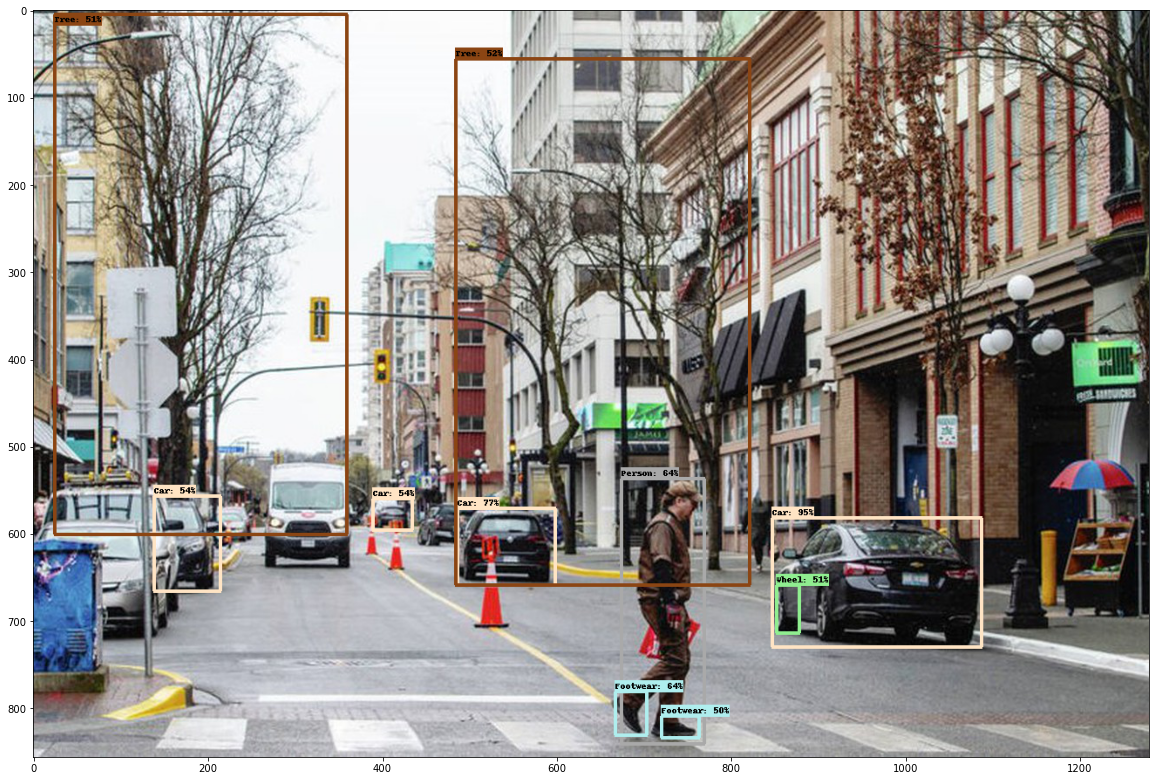

In [59]:
results = run_detector(detector, downloaded_image_path)

In [60]:
results.keys()

dict_keys(['detection_scores', 'detection_boxes', 'detection_class_labels', 'detection_class_names', 'detection_class_entities'])

In [61]:
df_detection = pd.DataFrame()
df_detection

Empty DataFrame
Columns: []
Index: []

In [62]:
path = '/Users/mis/LM/presentations_ibm/images/ai_in_movies/starwars_ai.jpg'

Found 100 objects.
Inference time:  9.154238224029541
Font not found, using default font.


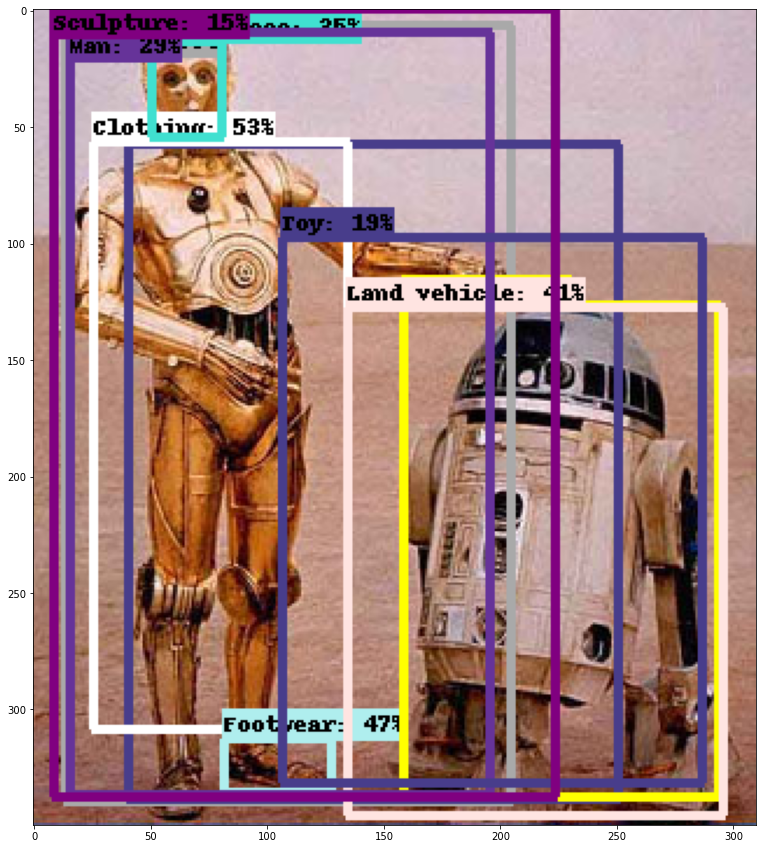

In [63]:
x = run_detector(detector, path)

# Task 2: Word Embeddings

https://radimrehurek.com/gensim/models/word2vec.html

https://nlp.stanford.edu/projects/glove/

https://jalammar.github.io/illustrated-word2vec/

In [1]:
import gensim
import spacy

In [2]:
import gensim.downloader

In [3]:
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [29]:
model = gensim.downloader.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [43]:
model.most_similar(positive=['king','woman'],negative=['man'], topn=1)

[('queen', 0.6713277101516724)]

In [54]:
model.most_similar(positive=['germany','france'],negative=['berlin'],topn=1)

[('spain', 0.5632880330085754)]

# Task 3: Image Captions